# ---Exercise 1---

## Question 1

**(c)** is correct. 

For female gender, the effective beta_0 will be 50 + 35 and will have a -10 beta_5 attribution of GPA. Males will have a beta_0 of 50, but will not be effected by the negative GPA factor.

## Question 2

**137.1k dollars** 

Plug the data values, Interaction between X1 and X2 = (X1)(X2).

## Question  3

**False**

In statistics, very little evidence implies the observations are due to random errors. Though contribution of gpuxiq is small, it is significant (though of little significance).

for example, gpaXiq net contribution is gpa x iq x (0.01), and that due gpa alone would be 20 x gpa.

percentage contribution of their interaction would be iq/20, which for an average of 100 iq equals 5%

# ---Exercise 2---

## Question 1

**(a)** yes, there is a strong relationship between predictor and response judging by high R^2 values and the low p value.

**(b)** 

Predicted mpg = 24.46708

Confidence Interval = (23.97308, 24.96108)

Prediction Interval = (14.8094, 34.12476)

In [13]:
Auto <- read.csv("data/Auto.csv")
Auto$horsepower <- as.numeric(as.character(Auto$horsepower))

LinearR <- lm(mpg ~ horsepower, data = Auto)
summary(LinearR)

newdata <- data.frame(horsepower = 98)
predict(LinearR, newdata, interval = "confidence", level = 0.95)
predict(LinearR, newdata, interval = "prediction", level = 0.95)



Warning message:
“NAs introduced by coercion”



Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


,fit,lwr,upr
1,24.46708,23.97308,24.96108


,fit,lwr,upr
1,24.46708,14.8094,34.12476


## Question 2


Warning message:
“NAs introduced by coercion”


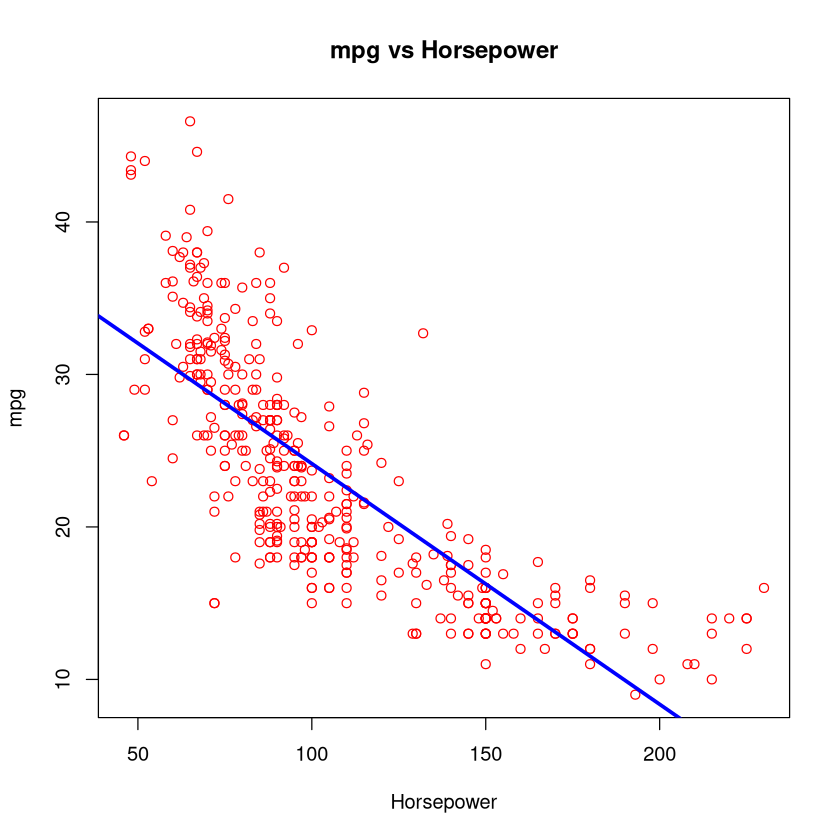

In [27]:
Auto <- read.csv("data/Auto.csv")
Auto$horsepower <- as.numeric(as.character(Auto$horsepower))

LinearR <- lm(mpg ~ horsepower, data = Auto)

plot(Auto$horsepower, Auto$mpg, main = "mpg vs Horsepower", xlab = "Horsepower", ylab = "mpg", pch = 1, col = "red")
abline(LinearR, col = "blue", lwd = 3)

## Question 3

There are few problems in the diagnostic plots.

The Residuals vs Fitted values plot should theoretically be scattered evenly above and below the axis(net must be a straight line y = 0) and it shouldn't matter at what point you take your data for this to be true, but our plot show +ve deviation, which becomes negative before becoming positive again, a curve is observed

In the Q-Q Residuals plot, we should expect the points to roughly lie along the straight theoretical line, however our plot shows points lying on a slightly convex shaped curve above the theoretical line

the root(standardised residuals) vs Fitted values plot, should ideally approximately be a straight line, but our plot is more of a slight V shaped line with heavy fanning behaviour being observed where the spread of residuals increases with our input parameter indicating non constant variance

Residuals vs Leverage plot shows most points lie on lower side leverage. mostly the graph looks ok, there are few points with large leverages, with 117 being the highest. Higher leverage seems to favour high residual points


Warning message:
“NAs introduced by coercion”


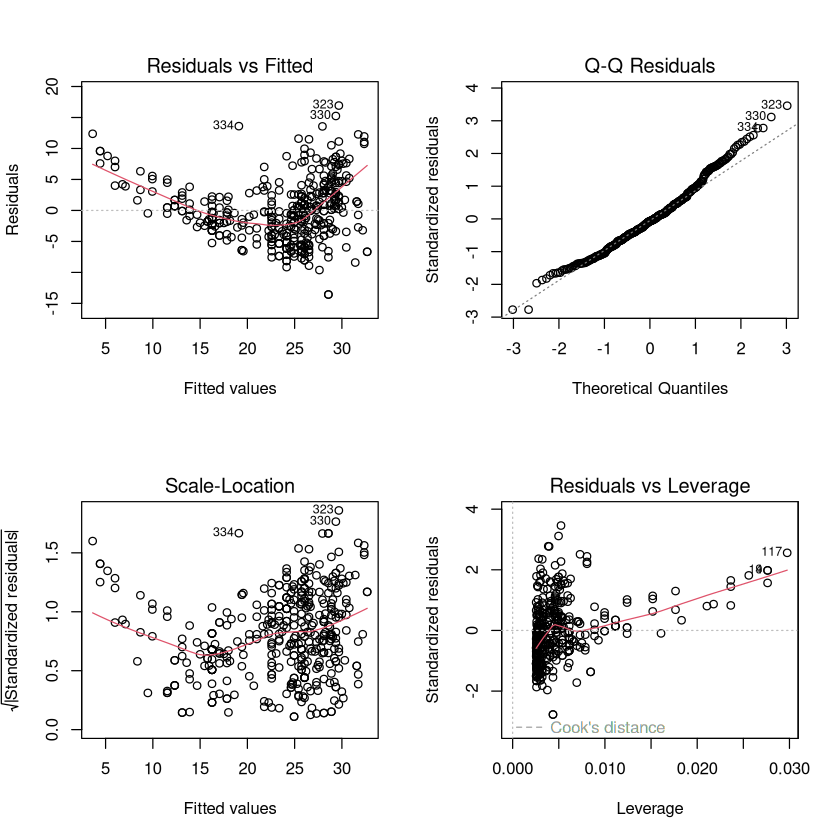

In [31]:
Auto <- read.csv("data/Auto.csv")
Auto$horsepower <- as.numeric(as.character(Auto$horsepower))

LinearR <- lm(mpg ~ horsepower, data = Auto)

par(mfrow=c(2,2))
plot(LinearR)

# ---Exercise 3---

## Question 1

This doesn't look like a flat noise signal, it most probably is a random walk with a negative drift due to its decreasing mean

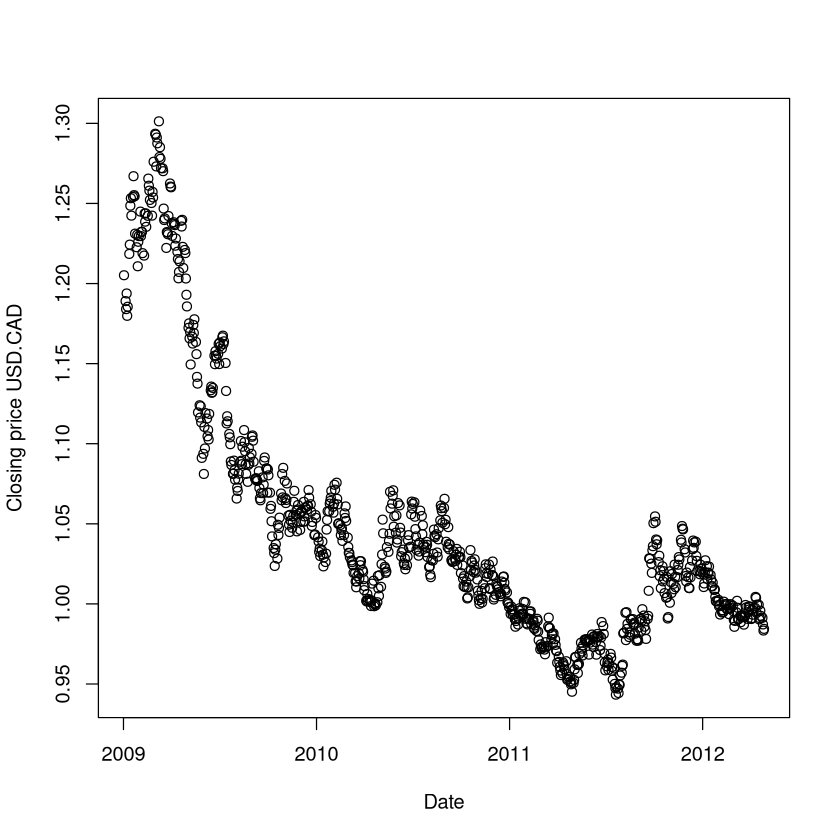

In [15]:
audcad <- read.csv("data/inputData_AUDCAD_20120426.csv")
audusd <- read.csv("data/inputData_AUDUSD_20120426.csv")

data <- merge(audcad, audusd, by = "Date")
data$Date <- as.Date(as.character(data$Date), format = "%Y%m%d")

data$cadbyusd <- data$Close.x / data$Close.y

plot(data$Date, data$cadbyusd, xlab = "Date", ylab = "Closing price USD.CAD")

## Question 2

The series is non stationary, 

p > 0.05 and t-statistic exceeds that of calculated 90% critical value

In [23]:
audcad <- read.csv("data/inputData_AUDCAD_20120426.csv")
audusd <- read.csv("data/inputData_AUDUSD_20120426.csv")

data <- merge(audcad, audusd, by = "Date")
data$Date <- as.Date(as.character(data$Date), format = "%Y%m%d")
data$cadbyusd <- data$Close.x / data$Close.y

data$log <- log(data$cadbyusd)

tseries <- adf.test(data$log, k = 1)

urca <- ur.df(data$log, type = "drift", lags = 1)

t_stat <- urca@teststat[1]
crit_90 <- urca@cval[1, "10pct"]
p_val <- tseries$p.value

cat("ADF t-statistic:", t_stat, "\n")
cat("p-value:", p_val, "\n")
cat("90% Confidence Critical Value:", crit_90, "\n")

if(t_stat > crit_90){
    print("Non stationary")
} else {
    print("Stationary")
}

ADF t-statistic: -1.863208 
p-value: 0.4662591 
90% Confidence Critical Value: -2.57 
[1] "Non stationary"


## Question 3

The half life comes out to be 95.5883292692857 or approximately 3 months. This is not practical for a short-term trader, who usually makes trades in time spans of hours, days or weeks.

In [29]:
audcad <- read.csv("data/inputData_AUDCAD_20120426.csv")
audusd <- read.csv("data/inputData_AUDUSD_20120426.csv")

data <- merge(audcad, audusd, by = "Date")
data$Date <- as.Date(as.character(data$Date), format = "%Y%m%d")
data$cadbyusd <- data$Close.x / data$Close.y

data_lag <- data$cadbyusd[-length(data$cadbyusd)]
delta_y <- diff(data$cadbyusd)

LinearR <- lm(delta_y ~ data_lag)

lambda <- coef(LinearR)["data_lag"]
half_life <- -log(2) / lambda

half_life


data_lag 
95.58833

# ---Exercise 4---

## Question 1

The pearson correlation factor comes out as 0.957532266075162. 

A Very Strong correlation is observed between the two closing prices

Correlation Coefficient: 0.9575323

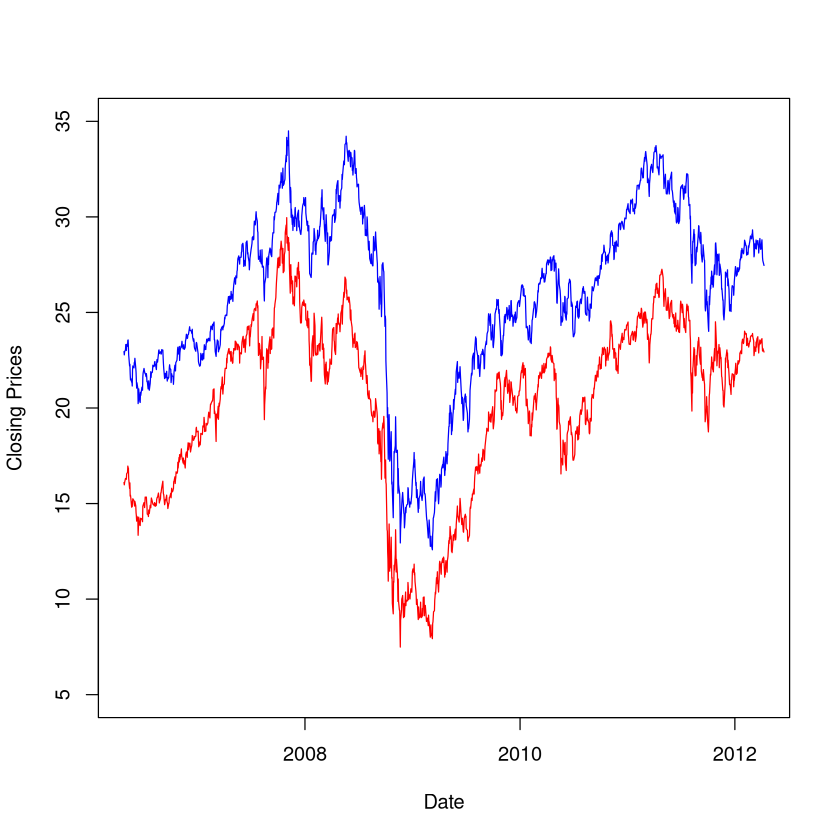

In [46]:
data <- read.csv("data/inputData_EWA_EWC.csv")
data$Date <- as.Date(as.character(data$Date), format = "%Y%m%d")
data$emp <- data$EWA - data$EWA

plot(data$Date,data$emp, xlab = "Date", ylab = "Closing Prices", ylim = c(5, 35))
lines(data$Date, data$EWA, col = "red")
lines(data$Date, data$EWC, col = "blue")

cat("Correlation Coefficient:", cor(data$EWA, data$EWC))


## Question 2

Hedge ratio comes out to 0.9526601, very close to a one to one hedge

In [55]:
data <- read.csv("data/inputData_EWA_EWC.csv")
data$Date <- as.Date(as.character(data$Date), format = "%Y%m%d")

linearR <- lm(data$EWA ~ data$EWC)
cat("Hedge Ratio:", coef(linearR)["data$EWC"])


Hedge Ratio: 0.9526601

## Question 3

Daily values of spread has been plotted for easier visualisation

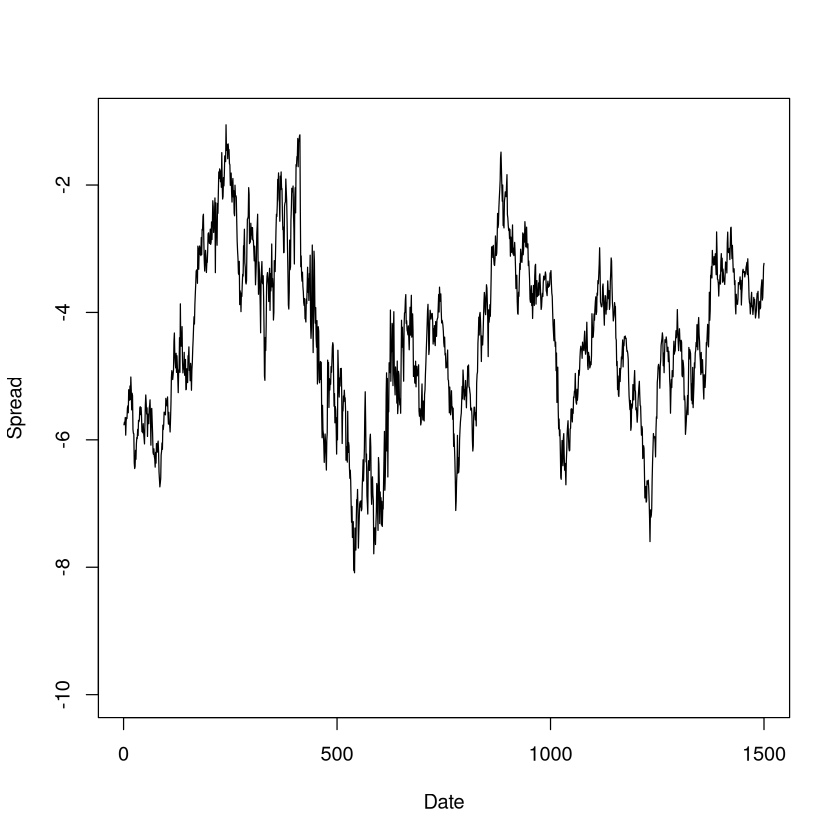

In [65]:
data <- read.csv("data/inputData_EWA_EWC.csv")
data$Date <- as.Date(as.character(data$Date), format = "%Y%m%d")
data$emp <- data$EWA - data$EWA

spread <- (data$EWA - (0.9526601) * (data$EWC))

plot(data$emp, data$date, xlab = "Date", ylab = "Spread", ylim = c(-10, -1))
lines(spread, data$date)

## Question 4

ADF test yields a p value of 0.02901 which is less that 0.05.

Hence for alpha = 0.95, the series is stationary

In [72]:
data <- read.csv("data/inputData_EWA_EWC.csv")
data$Date <- as.Date(as.character(data$Date), format = "%Y%m%d")
data$emp <- data$EWA - data$EWA

spread <- (data$EWA - (0.9526601) * (data$EWC))
result <- adf.test(spread, k = 1)
result


	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -3.6381, Lag order = 1, p-value = 0.02901
alternative hypothesis: stationary


## Question 5

Mean reversion half life turns out to be 27.95091 days, about a month long.

We could expect the data to return halfway towards its mean in a months time

In [76]:
data <- read.csv("data/inputData_EWA_EWC.csv")
data$Date <- as.Date(as.character(data$Date), format = "%Y%m%d")
data$emp <- data$EWA - data$EWA

spread <- (data$EWA - (0.9526601) * (data$EWC))

spread_lag <- spread[-length(spread)] 
delta_spread <- diff(spread)

linearR <- lm(delta_spread ~ spread_lag)
lambda <- -coef(linearR)["spread_lag"]

half_life <- log(2)/lambda
cat("Half life:", half_life)

Half life: 27.95091